•    State the goal you aim to achieve, i.e. the main relationship you plan to investigate and why you think it is interesting/important to investigate it.

*Research Goals*

- Exploring the Alcohol Consumption of students and how different factors affect their grades
- Investigate whether alcohol consumption will lead to negative impacts on student performace representing by their grades

#### Below is a list of Attributes which will help us explore this dataset:
* **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* **sex** - student's sex (binary: 'F' - female or 'M' - male)
* **age** - student's age (numeric: from 15 to 22)
* **address** - student's home address type (binary: 'U' - urban or 'R' - rural)
* **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* **Medu - mother's education :** 
  * 0 - none,
  * 1 - primary education (4th grade)
  * 2 – 5th to 9th grade, 3 – secondary 
  * 4 – higher education)
* **Fedu - father's education** 
  * 0 - none, 
  * 1 - primary education (4th grade), 
  * 2 – 5th to 9th grade, 3 – secondary education 
  * 4 – higher education
* **Mjob - mother's job** 
  * 'teacher', 
  * 'health' care related, 
  *  civil 'services' (e.g. administrative or police),
  * 'at_home' or 'other')
* **Fjob - father's job** 
  * 'teacher', 
  * 'health' care related, 
  *  civil 'services' (e.g. administrative or police), 
  * 'at_home' or 'other')
* **reason - reason to choose this school** 
  * close to 'home', 
  * school 'reputation', 
  * 'course' preference or 'other'
* **guardian - student's guardian** 
  * 'mother', 'father' or 'other'
* **traveltime** - home to school travel time ( 1 - 1 hour)
* **studytime** - weekly study time ( 1 - 10 hours)
* **failures**- number of past class failures (numeric: n if 1<=n<3, else 4)
* **schoolsup** - extra educational support ( yes or no)
* **famsup** - family educational support ( yes or no)
* **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* **activities** - extra-curricular activities (yes or no)
* **nursery** - attended nursery school ( yes or no)
* **higher** - wants to take higher education ( yes or no)
* **internet** - Internet access at home ( yes or no)
* **romantic** - with a romantic relationship ( yes or no)
* **famrel** - quality of family relationships ( from 1 - very bad to 5 - excellent)
* **freetime** - free time after school ( from 1 - very low to 5 - very high)
* **goout** - going out with friends ( from 1 - very low to 5 - very high)
* **Dalc** - workday alcohol consumption ( from 1 - very low to 5 - very high)
* **Walc** - weekend alcohol consumption ( from 1 - very low to 5 - very high)
* **health** - current health status ( from 1 - very bad to 5 - very good)
* **absences** - number of school absences ( from 0 to 93)
#### These grades are related with the course subject, Math or Portuguese:

* **G1 - first period grade** (numeric: from 0 to 20)
* **G2 - second period grade** (numeric: from 0 to 20)
* **G3 - final grade** (numeric: from 0 to 20, output target)

•    Import, if appropriate for the use case you chose merge, and clean the data.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.metrics import mean_squared_error,r2_score
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

#for hypothesis testing
from scipy.stats import (
    zscore, 
    ttest_1samp, 
    ttest_ind,
    ttest_rel
)

### Reading the Data

In [2]:
mat=pd.read_csv(r'C:\Users\ams-duongn.EXPEDITORS\Desktop\learn\Data Science Master\M5W5\student-mat.csv')
por=pd.read_csv(r'C:\Users\ams-duongn.EXPEDITORS\Desktop\learn\Data Science Master\M5W5\student-por.csv')
print(mat.shape)
print(por.shape)

(395, 33)
(649, 33)


In [3]:
data = pd.concat([mat,por],axis=0)

print(data.info())
data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

(1044, 33)

In [4]:
print("Total Missing Values :",sum(data.isnull().sum()))

Total Missing Values : 0


•    Build different types of visualizations that you view appropriate (scatter, line plots, box plots etc). What conclusions do you draw from them? Use the visualizations wisely, they should enhance the story, not overload the reader/the person to whom you will present your results.

•    Investigate distributions of features (you may want to start from the target).

### Quick Overview Categorical Analysis

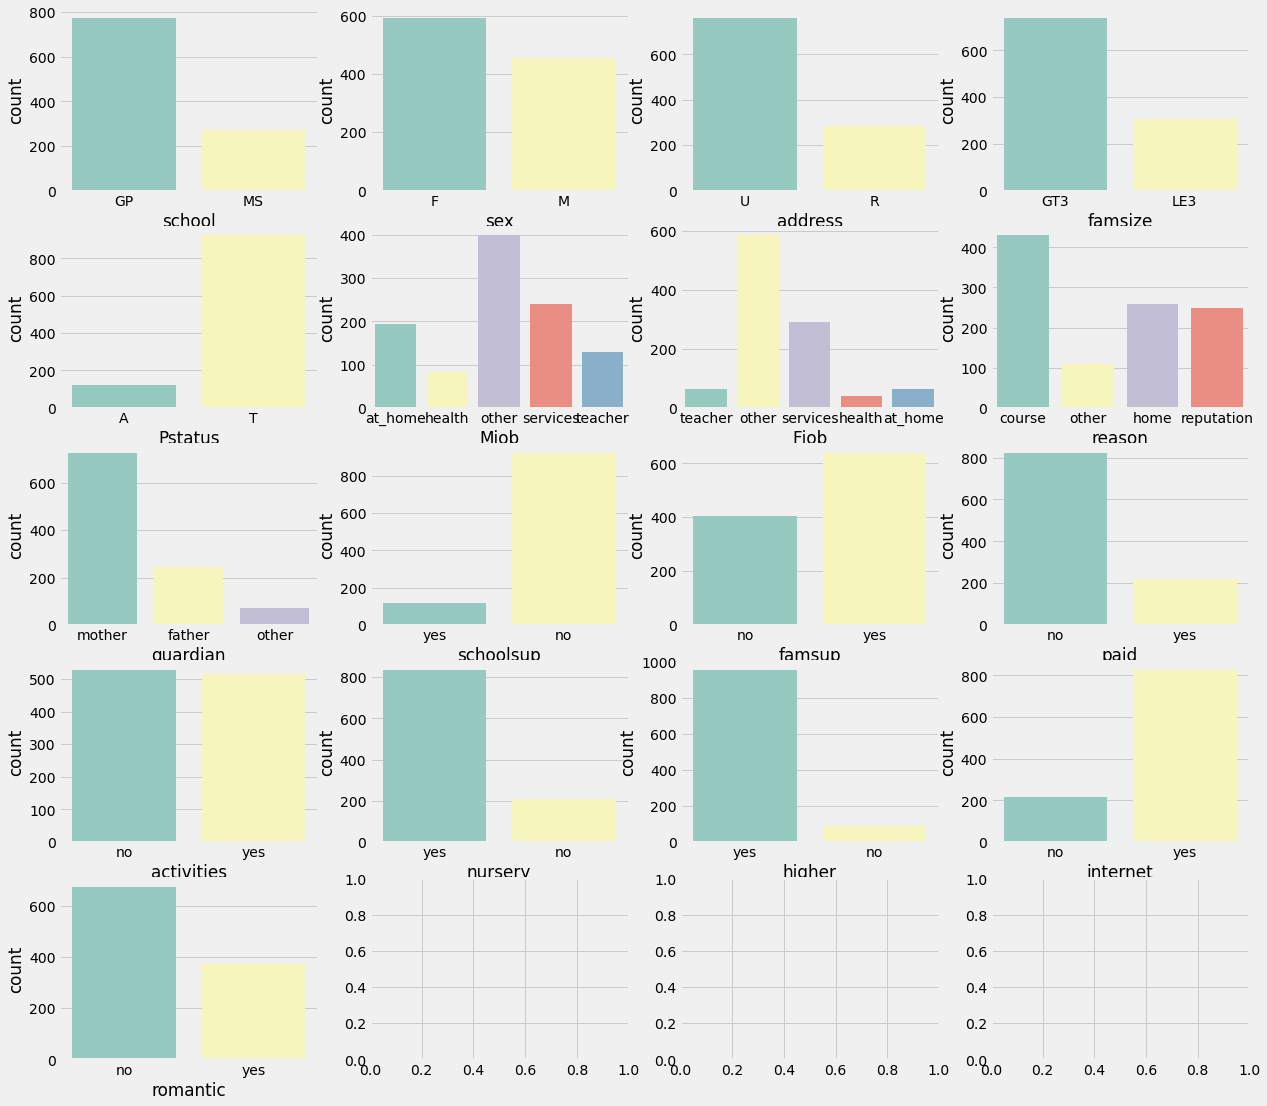

In [5]:
fig, ax = plt.subplots(5 ,4 ,figsize=(19, 18))
ax = ax.ravel()

cat = data.select_dtypes('object').columns
cat = data[cat]

axis = 0
for i in cat:
    sns.countplot(cat[i], ax=ax[axis], palette="Set3")
    axis += 1

plt.show()

Couple of things stand out on these plots

1. Most of the moms are not working, whereas most of the dads do work.
2. Most of the students don't get extra educational support ("schoolsup"), but primarily from their family
3. The principal guardian for most students are their mothers; which might exert some effect
4. Most students also have internet access and are willing to take higher education
5. Most students belong to the Gabriel Peirera school.
6. Most students come under the age group of 15-18 with almost equal proportion of males and females,
7. Most students belong to family with size greater than or equal to 3.
8. Students coming from urban area is higher compared to rural area.
9. Cohabitation status of a student's parents is moslty together.

#### **Let's explore a students's mother and father's job qualifications and figure out whether these two factors probably affect student's grades**

 <p><font size=3>Below we observe plots for job qualifications of parents segregated on how much a student receives family support from  parents. Be it financially or personally. We can conclude that for the Mother's job qualifications the <b>other</b> category has a considerabe amount of No's indicating that the students  may not be receiving family support from mothers with job qualifications as 'other'. It maybe a low income job, such that the parent is not able to provide her child the right amount of financial support for education or any other factor could be responsible for the student not getting adequate family educational support.</font></p>

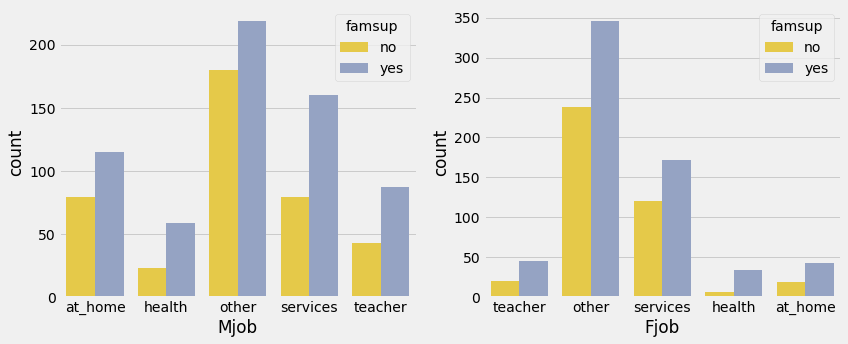

In [6]:
cols=['Mjob','Fjob']
fig=plt.figure()
for i,col in enumerate(cols):
    fig.add_subplot(1,2,i+1)
    fig.set_size_inches(12,5)
    sns.countplot(x=col,data=data,hue='famsup',palette='Set2_r')
    plt.tight_layout()

<font size=3>Below we observe that initially with students spending less time in travelling have a considerably higher studytime on an average over the week.Further towards 3 hrs of travel time we see a drastic drop in study time of almost 10 hours on average each week where (1=10 hours). Surprisingly just with 4 hrs of travelling time, there is sudden increase in study time for the students. Reasons can be effective time management by students etc.</font>

Text(0.5, 1.0, 'Travel time vs Stduy time')

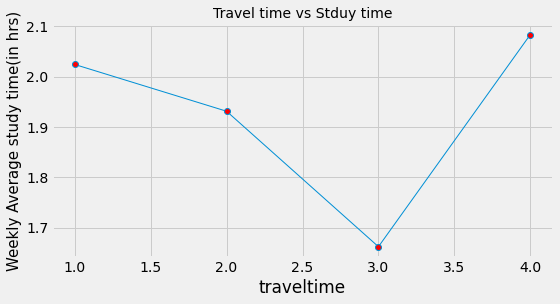

In [7]:
time=data.groupby('traveltime')['studytime'].mean().plot.line(figsize=(8,4),
                                                            marker='o',markerfacecolor='red',
                                                            linewidth=1)
plt.ylabel('Weekly Average study time(in hrs)',fontsize=15)
plt.title('Travel time vs Stduy time',fontsize=14)

<font size=3>Below is a line plot illustrating the distribution of study time of students vs their go out time. We notice that, initially, with low go out time the study time has seen a great increasing trend but as the go out time increases the study time has seen a plummet from 2.1 (almost 20 hrs) to almost 1.8 (10-15hrs).</font>

Text(0, 0.5, 'weekly average study time(in hrs)')

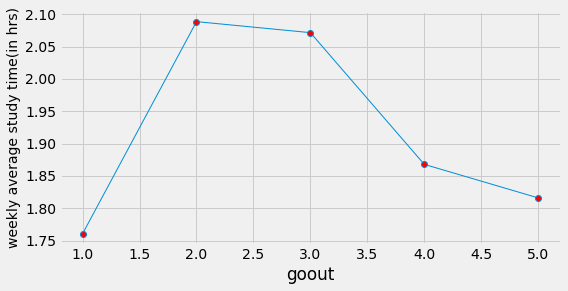

In [8]:
out=data.groupby('goout')['studytime'].mean().plot.line(figsize=(8,4),
                                                      marker='o',
                                                      markerfacecolor='red',
                                                      linewidth=1)
plt.ylabel('weekly average study time(in hrs)',fontsize=14)

#### **Let's see if we can gain information thorugh internet accessibility for a particular student**

<font size=3>Below line plots show the distribution of students grades **G1**,**G2** and **G3** over their weekly average study time. Moreover, the purpose from internet usage affects the grades can also be concluded through the plots. For both grades we can observe that with no internet accessibility and low study hours the students grades are poor. On the contrary, although the student studies for less time the grades obtained is comparatively better for those who have internet accessibility.Lastly with increasing study time with no internet students show a drastic improvement in marks while those with internet and good study hours in contrast shows a slight decrease.

Reasons: students with internet can waste time while those without it can concentrate properly on their studies. However. it also depends on how effectively a student uses the internet for his/her studies.</font>

This plots also shows that the study hours indeed positively correlated to the student grade.

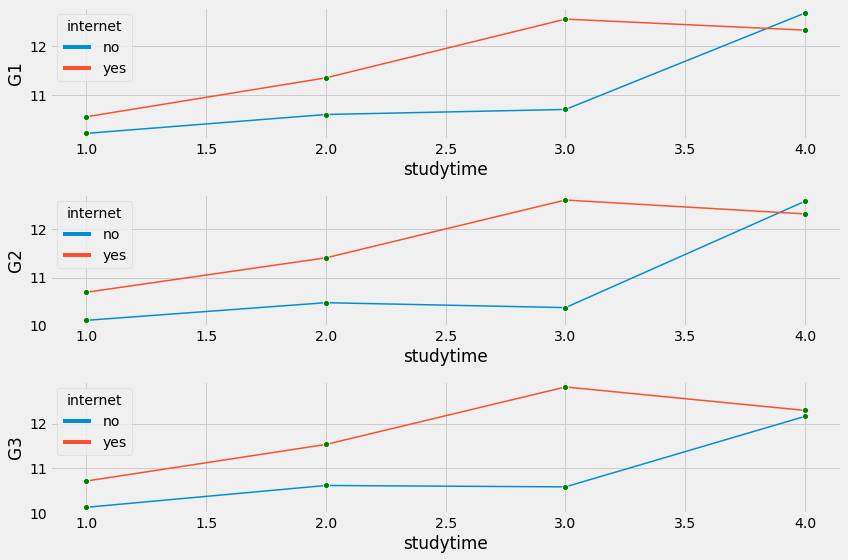

In [9]:
grades=['G1','G2','G3']
fig=plt.figure()
for i,col in enumerate(grades):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(12,8)
    
    x=data.groupby(['internet','studytime'])[col].mean()
    x=x.reset_index('studytime')
    
    sns.lineplot(x='studytime',y=col,hue=x.index,data=x,
                 marker='o',markerfacecolor='green',linewidth=1.5)
    plt.tight_layout()

#### Let's see which factors  lead to an increase in a student's daily and weekly alcohol consumption.

<font size=3>Below barplots illustrate the Daily and weekly alcohol consumption of students and its distribution over how frequently students go out with friends. For obvious reasons we see an increase in alcohol consumption as a result of spending more time outdoors with friends.This in turn could lead to overall degradation of health of the students.</font>

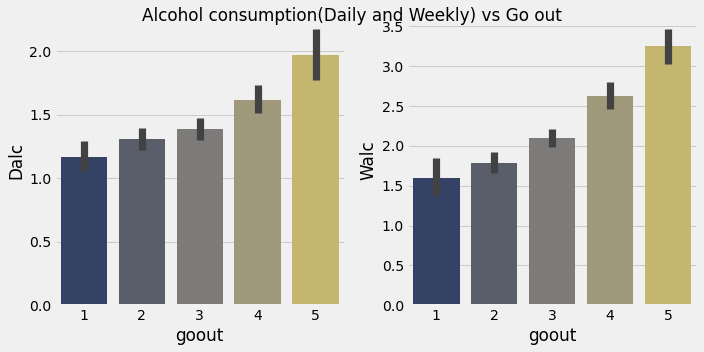

In [10]:
cols=['Dalc','Walc']
fig=plt.figure()

for i,col in enumerate(cols):
    fig.add_subplot(1,2,i+1)
    fig.set_size_inches(10,5)
    
    sns.barplot(x='goout',y=col,data=data,palette='cividis')
    plt.tight_layout()
    plt.suptitle('Alcohol consumption(Daily and Weekly) vs Go out')

In [11]:
skew=pd.DataFrame(data.skew().sort_values(ascending=False))
skew.style.background_gradient(cmap='Blues')

The skewness of the distribution from absences and failures features means that most students do attend the classes and have less than 1 failure. The below graph also shows that most students only spend 2 hours to study.

In [12]:
studytime = data["studytime"].value_counts()
st = px.bar(x=studytime.index, y=studytime.values)
st.update_traces(marker_color="#f39189")
st.update_layout(xaxis_title="Hours of studing", yaxis_title="Count", title="Study time")
st.show()

In [13]:
failure = data["failures"].value_counts()
fl = px.bar(x=failure.index, y=failure.values)
fl.update_traces(marker_color="#bb8082")
fl.update_layout(xaxis_title="Failed subject", yaxis_title="Count", title="Failing")
fl.show()

In [14]:
absences = data["absences"].value_counts()
ab = px.bar(x=absences.index[1:], y=absences.values[1:])
ab.update_traces(marker_color="#046582")
ab.update_layout(xaxis_title="Absenced lessons", yaxis_title="Count", title="Count of absence on lessons")
ab.show()

•    Find linear relationships in the data by using correlation plots. What story does the correlation plot tell you? What does it not?

### Correlations Analysis
#### **Let's explore to see if we can find any linear relationship among the variables that have effect on the student's grades**

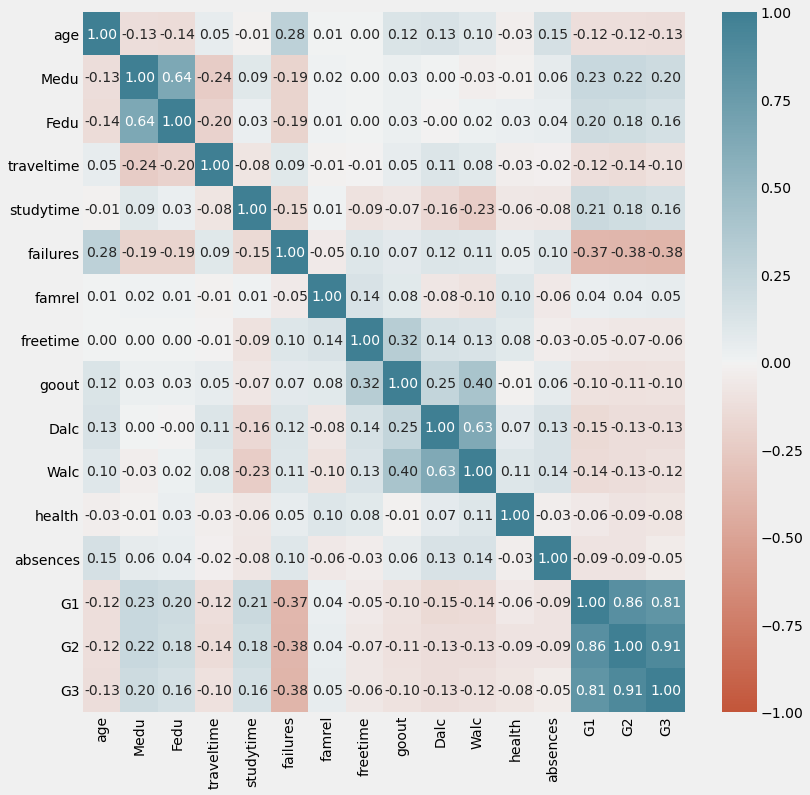

In [15]:
fig, ax = plt.subplots(figsize=(12, 12))

numbers = data.select_dtypes('int64').columns
numbers = data[numbers]

sns.heatmap(numbers.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), fmt='.2f', annot=True)
plt.show()

<Figure size 1152x1152 with 0 Axes>

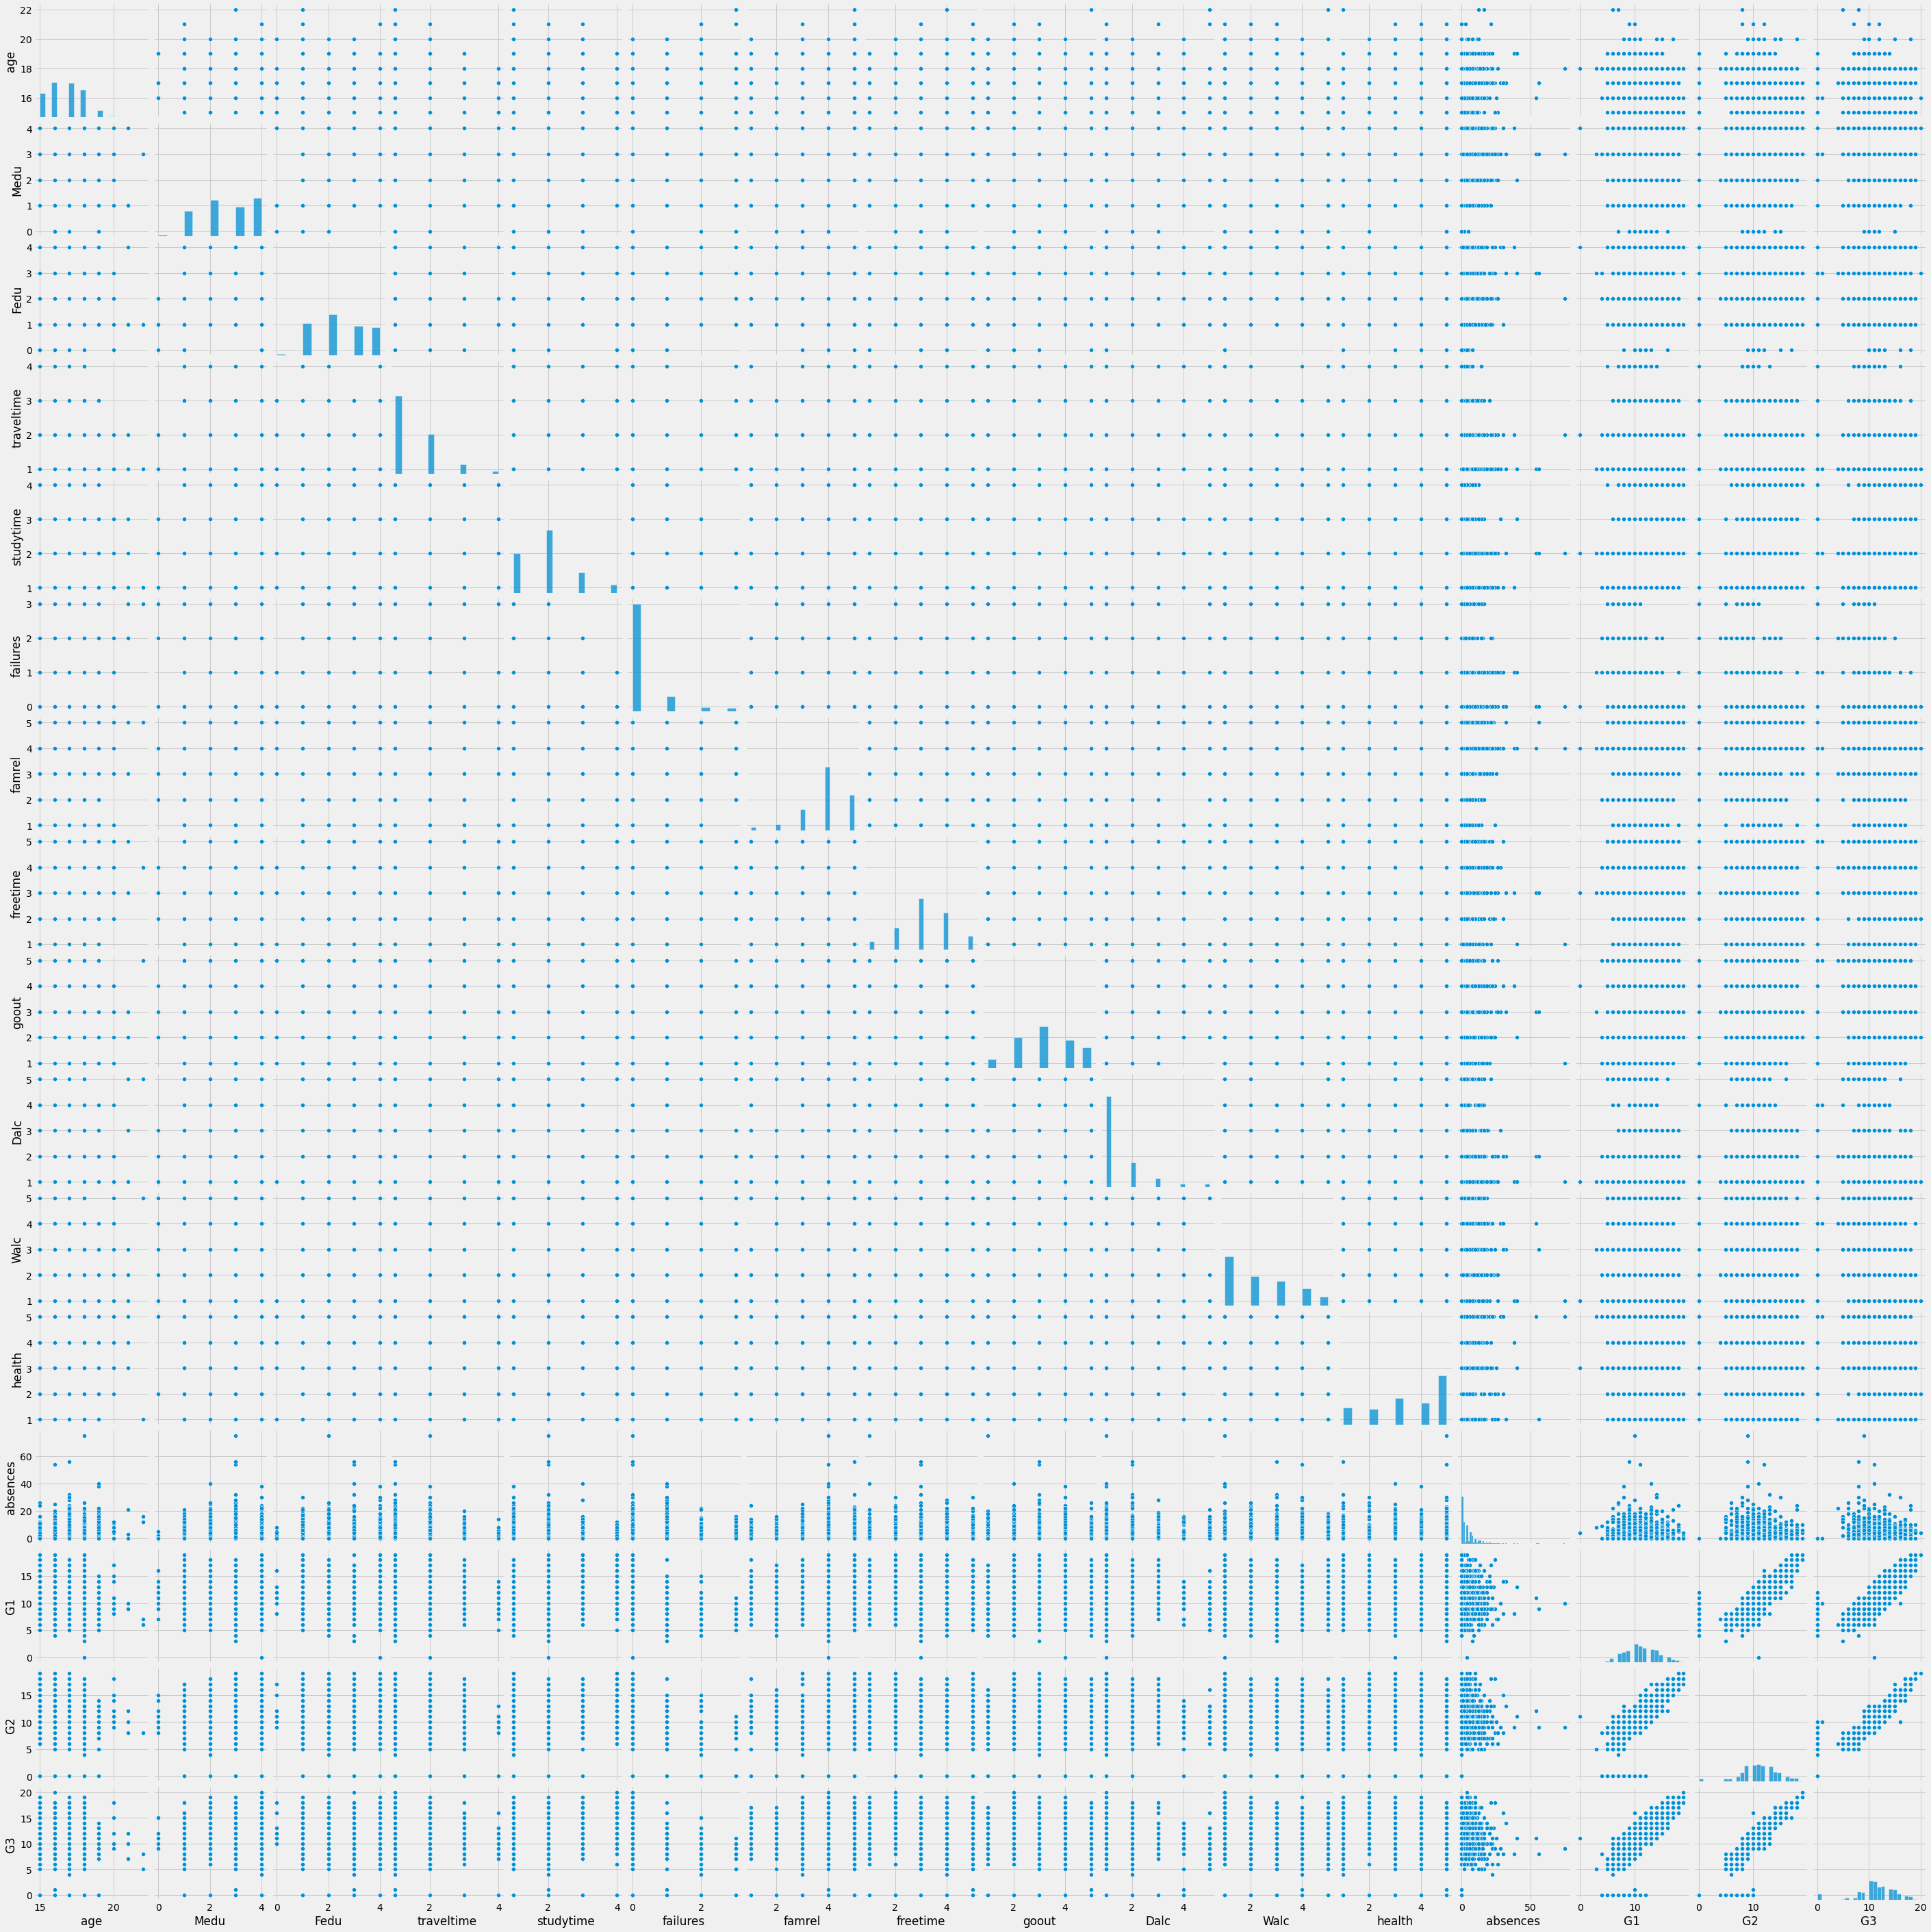

In [16]:
plt.figure(figsize=(16,16))
sns.pairplot(data)

1) "Walc"

- If we focus our attention on "Walc", we see that the strongest relationships are with "Dalc", "goout" and "studytime".
- Interesting to see how "age", "Medu" and "Fedu" don't play a role in student's alcohol consumption habits.
- "Walc" is also negative correlated with student's GDP, but the relationship is not strong

2) G1, G2, G3

- We see that these variables all share the same trends, i will combine them into a final GDP and then drop periods to reduce the dataset dimensions a bit
- The factors that affect a student's Grades the most are "Medu", "Fedu", "studytime" and "failures".
- In addition, as from our analysis above, we also conclude that the travelling time and having internet access also affects study time variable, indirectly affects the student grades.
- Having "failures" a stronger relationship than with "studytime", could mean that failures might affect the self-esteem of the students and they dont want to put more effort into studying to improve their grades.

The pair plot above confirm the findings from the correlation matrix. There is no direct causal relationship from a single variable onto the student performance but rather a combination of factors. This is also the area where the correlation matrix dont give further insights into, since it is an analysis per pair variables.

**Conclusion for the 1st goal**

1) The factors that affect a student's Grades the most are their mothers' education, fathers' education, "studytime" and past "failures".
2) Alcohol consumption during the week and weekend also have negative correlation to study time; plus similar relationship between these variables and students grades can be inferred as well, although the relationship is not strong
3) In addition, as from our analysis above, we also conclude that the travelling time and having internet access also affects study time variable, indirectly affects the student grades.
4) Having "failures" a stronger relationship than with "studytime", could mean that failures might affect the self-esteem of the students and they dont want to put more effort into studying to improve their grades.

•    Use hypothesis tests wisely to see if different groups in the data behave differently (you don’t need to test this for all features, only for a few which make sense to you).

### Hypothesis Testing
#### **Analysis of alcohol consumption and its effect on student's grade**

<font size=3>Below line plots illustrate how daily alcohol consumptions affect the grades of students. Prominently students with average to good health have average to better grades even with a considerable increase in their alcohol consumption. Nevertheless one thing to notice is that students with extremely poor health initially have  achieved good grades initially, with an increase in alcohol consumption their grades have drastically deteriorated taken into account their poor health and increased alcohol intake (line 1). This trend shows quite consistently in all three periods available in the dataset. However, the lines in this plot are giving mixed signal about the effect of alcohol consumption to student grades with regards to their health, so we need to investigate further.</font>

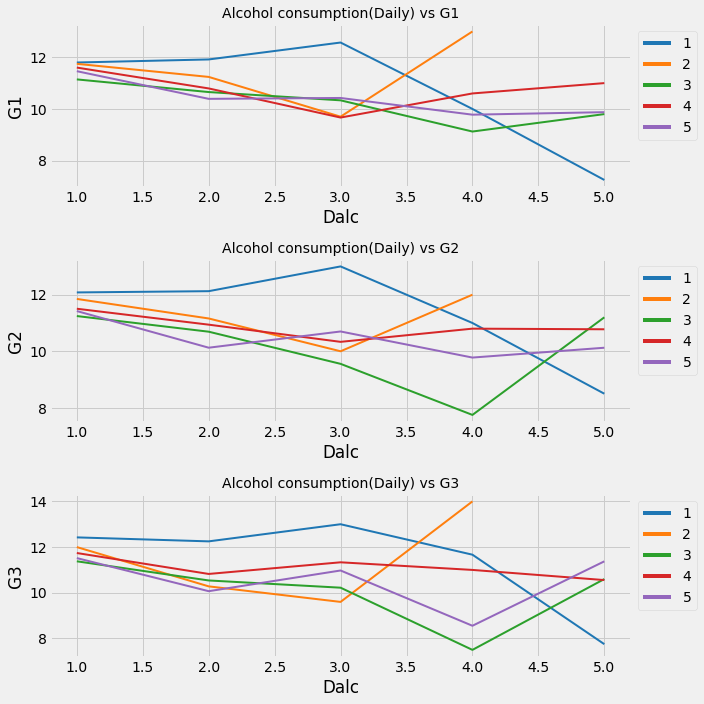

In [17]:
cols=['G1','G2','G3']
fig=plt.figure()

for i,col in enumerate(cols):
    fig.add_subplot(3,1,i+1)
    fig.set_size_inches(10,10)
    
    health=data.groupby(['Dalc','health'])[col].mean()
    health=health.reset_index('Dalc')
    
    sns.lineplot(x='Dalc',y=col,hue=health.index,
                 data=health,palette='tab10',linewidth=2)
    plt.tight_layout()
    plt.title(f'Alcohol consumption(Daily) vs {col}',fontsize=14)
    plt.legend(bbox_to_anchor=(1,1))

As seen from the above plot, the three grade groups are showing corresponding trend to another variable factor, I decided to proceed creating a single GDP column to simplify our analysis and still keep its generalization characteristic. Also, this posted an interesting question to look at for the first hypothesis testing experiment.

In [18]:
data['GDP'] = data['G1'] + data['G2'] + data['G3']
data = data.drop(columns=['G1', 'G2', 'G3'])

Develop Hypotheses Sets to determine whether there is a relationship between the amount of alcohol consumption during workdays and the student GDP with regards to their health condition:

*1st Hypothesis Sets:*

- Null Hypothesis (H0): There is no evidence that the amount of alcohol consumption during weekdays has negative effect on the student overall GDP, given that these students are in less than average health condition (less than 2 on the scale of 1-5).
- Alternative Hypothesis (HA): There is statistical evidence that the amount of alcohol consumption during weekdays has negative effect on the student overall GDP, given that these students are in less than average health condition (less than 2 on the scale of 1-5).

I choose for this hypothesis testing the standard Alpha (significance level) value of 0.05, given the fact it is widely accepted in the industry.

Designing the test:
I will test between two samples:
- Group 1: Students with less than average (3 on the scale of 1-5) regarding their health condition consume less than average (3 on the scale of 1-5) amount of alcohol during workdays.
- Group 2: Students with less than average (3 on the scale of 1-5) regarding their health condition consume average to higher (3 on the scale of 1-5) amount of alcohol during workdays.

In [19]:
ttest_ind(data.loc[(data.health <3) & (data.Dalc <3)]['GDP'], data.loc[(data.health <3) & (data.Dalc >=3)]['GDP'])

Ttest_indResult(statistic=1.8630408645764658, pvalue=0.06359282858503999)

The test result for this question shows that there is insufficient statistical evidence that there is difference in GDP between the two group of poor health students with one consumes more alcohol during weekdays than other that is not from random chance (pvalue > 0.05).

Hence we cannot reject the hypothesis:
"There is no evidence that the amount of alcohol consumption has negative effect on the student overall GDP, given that these students are in less than average health condition (less than 2 on the scale of 1-5)."

*2nd Hypothesis Sets:*

Null Hypothesis (H0): There is no evidence that the amount of alcohol consumption during weekdays has negative effect on the student overall GDP, given that these students are in average or better health condition (higher or equal to 3 on the scale of 1-5).

Alternative Hypothesis (HA): There is statistical evidence that the amount of alcohol consumption during weekdays has negative effect on the student overall GDP, given that these students are in average or better health condition (higher or equal to 3 on the scale of 1-5).

I choose for this hypothesis testing the standard Alpha (significance level) value of 0.05, given the fact it is widely accepted in the industry.

Similarly, I will test between two samples:

- Group 1: Students with average to better (3 on the scale of 1-5) regarding their health condition consume less than average (3 on the scale of 1-5) amount of alcohol during workdays.
- Group 2: Students with average to better (3 on the scale of 1-5) regarding their health condition consume average to higher (3 on the scale of 1-5) amount of alcohol during workdays.

In [20]:
ttest_ind(data.loc[(data.health >=3) & (data.Dalc <3)]['GDP'], data.loc[(data.health >=3) & (data.Dalc >=3)]['GDP'])

Ttest_indResult(statistic=2.7509359104051123, pvalue=0.006079940426913788)

The test result for this question shows that there is strong probability that there is indeed difference in GDP between the two group of average to very good students with one consumes more alcohol during weekdays than other that is not from random chance (pvalue < 0.05).

Hence we reject the hypothesis: "There is no evidence that the amount of alcohol consumption has negative effect on the student overall GDP, given that these students are in average or better health condition (higher or equal to 3 on the scale of 1-5)."

*3rd Hypothesis Sets:*

Null Hypothesis (H0): There is no evidence that the amount of alcohol consumption during weekdays has negative effect on the student overall GDP, regardless of their health condition.

Alternative Hypothesis (HA): There is statistical evidence that the amount of alcohol consumption during weekdays has negative effect on the student overall GDP, regardless of their health condition.

I choose for this hypothesis testing the standard Alpha (significance level) value of 0.05, given the fact it is widely accepted in the industry.

Similarly, I will test between two samples:

- Group 1: Students who consume less than average (3 on the scale of 1-5) amount of alcohol during workdays.
- Group 2: Students who consume average to higher (3 on the scale of 1-5) amount of alcohol during workdays.

In [21]:
ttest_ind(data.loc[data.Dalc <3]['GDP'], data.loc[data.Dalc >=3]['GDP'])

Ttest_indResult(statistic=3.3912278975407713, pvalue=0.0007219213261412142)

The test result for this question shows that there is strong probability that there is indeed difference in GDP between the two group of students with one consumes more alcohol during weekdays than other that is not from random chance (pvalue < 0.05).

Hence we reject the hypothesis: "There is no evidence that the amount of alcohol consumption has negative effect on the student overall GDP, regardless of their health condition."

4th Hypothesis Sets:

Null Hypothesis (H0): There is no evidence that the amount of alcohol consumption during weekend has negative effect on the student overall GDP, regardless of their health condition.

Alternative Hypothesis (HA): There is statistical evidence that the amount of alcohol consumption during weekend has negative effect on the student overall GDP, regardless of their health condition.

I choose for this hypothesis testing the standard Alpha (significance level) value of 0.05, given the fact it is widely accepted in the industry.

Similarly, I will test between two samples:

- Group 1: Students who consume less than average (3 on the scale of 1-5) amount of alcohol during weekend.
- Group 2: Students who consume average to higher (3 on the scale of 1-5) amount of alcohol during weekend.

In [22]:
ttest_ind(data.loc[data.Walc <3]['GDP'], data.loc[data.Walc >=3]['GDP'])

Ttest_indResult(statistic=3.7260436443308174, pvalue=0.00020495355943316273)

The test result for this question shows that there is strong probability that there is indeed difference in GDP between the two group of students with one consumes more alcohol during weekend than other that is not from random chance (pvalue < 0.05).

Hence we reject the hypothesis: "There is no evidence that the amount of alcohol consumption during weekend has negative effect on the student overall GDP, regardless of their health condition."

**Conclusions for the 2nd goal**

1) From the two hypothesis testing results, it is apparent that the true conclusions on the effect of alcohol consumption during weekdays to students' grades with regards to their health contradict with our initial assumptions from the line plots.

2) Hence, students with average and good health should be aware that drink more alcohol during the week is actually affect their GDPs, having more evidence than the group of students with poor health in this relationship. Nevertheless, from the line plot, students with very bad health should better avoid from consuming alcohol due to the steep decline in their grades when they are over drinking.

3) Last but not least, from the 3rd and 4th test, we can conclude that consuming alcohol during both workdays and weekend will lead to negative impacts on student performace representing by their grades.